In [1]:
'''
처음에는 hidden layer를 2개만 하고 NN도 그다지 wide하게 하지 않았다. learning rate도 0.001로 했었다.
그래서 accuracy가 0.94정도로 나왔었다. 
layer 갯수를 늘리고 범위도 넓게 하고 learning rate도 약간 낮추었다. sigmoid를 relu로 바꾸고, GradientOpti~를 Adam으로 바꾸고, 
random을 xavier initializer로 바꾸었다
또한 overfitting을 막기위해 dropout을 사용했더니 처리 속도는 늦어졌지만 아래와 같이 accuracy가 0.9833이 나왔다. 또한 cost값도 훨씬 작아졌다.
0.985가 나온 친구들은 레이어도 더 늘리고 범위도 넓게 하고 learning rate도 더 적게 했다는데 
처리속도가 너무 느려서 나는 이정도만 해도 굉장히 높아졌다고 생각한다.
tensorboard를 사용하려면 코드를 많이 고쳐야해서 오늘은 시간이 부족해서 못했다. 
제출 후에 다시 자료를 보며 배워서 fashion mnist에 적용해봐야겠다.

아래 코드에도 짤막하게 주석을 달아놓았다.
'''

'\n처음에는 hidden layer를 2개만 하고 NN도 그다지 wide하게 하지 않았다. learning rate도 0.001로 했었다.\n그래서 accuracy가 0.94정도로 나왔었다. \nlayer 갯수를 늘리고 범위도 넓게 하고 learning rate도 약간 낮추었다. sigmoid를 relu로 바꾸고, GradientOpti~를 Adam으로 바꾸고, \nrandom을 xavier initializer로 바꾸었다\n또한 overfitting을 막기위해 dropout을 사용했더니 처리 속도는 늦어졌지만 아래와 같이 accuracy가 0.9833이 나왔다. 또한 cost값도 훨씬 작아졌다.\n0.985가 나온 친구들은 레이어도 더 늘리고 범위도 넓게 하고 learning rate도 더 적게 했다는데 \n처리속도가 너무 느려서 나는 이정도만 해도 굉장히 높아졌다고 생각한다.\ntensorboard를 사용하려면 코드를 많이 고쳐야해서 오늘은 시간이 부족해서 못했다. \n제출 후에 다시 자료를 보며 배워서 fashion mnist에 적용해봐야겠다.\n\n아래 코드에도 짤막하게 주석을 달아놓았다.\n'

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import math
from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  
tf.reset_default_graph() #이 함수를 써주지 않으면 Xavier를 쓸 때 초기화가 안돼서 자꾸 경고문구가 뜬다
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

#Xavier initializer
#슬라이드에 나와있는 대로 하면 자꾸 오류가 생겨서 따로 알려준 github 링크로 들어가서 그대로 따라했다
def xavier_init(n_inputs, n_outputs, uniform=True):
  if uniform:
    init_range = math.sqrt(6.0 / (n_inputs + n_outputs))
    return tf.random_uniform_initializer(-init_range, init_range)
  else:
    stddev = math.sqrt(3.0 / (n_inputs + n_outputs))
    return tf.truncated_normal_initializer(stddev=stddev)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
#미리 각종 상수나 식들을 적어놓음
learning_rate = 0.0007
training_epochs = 15
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)
keep_prob = tf.placeholder(tf.float32)
dropout_rate = tf.placeholder("float")


In [4]:
with tf.name_scope("Input_Layer"):
    X = tf.placeholder(tf.float32, [None, 784])
    Y = tf.placeholder(tf.float32, [None, 10])

with tf.name_scope("H_Layer1"):
    W1 = tf.get_variable("W1", shape=[784, 512], initializer=xavier_init(784, 512))
    B1 = tf.Variable(tf.random_normal([512]))
    _L1 = tf.nn.relu(tf.add(tf.matmul(X,W1),B1))
    L1 = tf.nn.dropout(_L1, dropout_rate)

with tf.name_scope("H_Layer2"):
    W2 = tf.get_variable("W2", shape=[512, 512], initializer=xavier_init(512, 400))
    B2 = tf.Variable(tf.random_normal([512]))
    _L2 = tf.nn.relu(tf.add(tf.matmul(L1, W2),B2)) # Hidden layer with ReLU activation
    L2 = tf.nn.dropout(_L2, dropout_rate)

with tf.name_scope("H_Layer3"):    
    W3 = tf.get_variable("W3", shape=[512, 512], initializer=xavier_init(400, 256))
    B3 = tf.Variable(tf.random_normal([512]))
    _L3 = tf.nn.relu(tf.add(tf.matmul(L2, W3),B3)) # Hidden layer with ReLU activation
    L3 = tf.nn.dropout(_L3, dropout_rate)

with tf.name_scope("H_Layer4"):
    W4 = tf.get_variable("W4", shape=[512, 256], initializer=xavier_init(256, 256))
    B4 = tf.Variable(tf.random_normal([256]))
    _L4 = tf.nn.relu(tf.add(tf.matmul(L3, W4),B4)) # Hidden layer with ReLU activation
    L4 = tf.nn.dropout(_L4, dropout_rate)

with tf.name_scope("OUTPUT"):
    W5 = tf.get_variable("W5", shape=[256, 10], initializer=xavier_init(256, 10))
    B5 = tf.Variable(tf.random_normal([10]))
    hypothesis = tf.add(tf.matmul(L4, W5), B5)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
   logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
tf.summary.scalar("Cost", cost)

correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
tf.summary.scalar("Accuracy", accuracy)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



<tf.Tensor 'Accuracy:0' shape=() dtype=string>

Epoch: 0001 cost = 0.565209198
Epoch: 0002 cost = 0.194189459
Epoch: 0003 cost = 0.144080599
Epoch: 0004 cost = 0.116825159
Epoch: 0005 cost = 0.101618007
Epoch: 0006 cost = 0.085057558
Epoch: 0007 cost = 0.075654451
Epoch: 0008 cost = 0.068291243
Epoch: 0009 cost = 0.061003829
Epoch: 0010 cost = 0.055138744
Epoch: 0011 cost = 0.051158181
Epoch: 0012 cost = 0.047686544
Epoch: 0013 cost = 0.047215570
Epoch: 0014 cost = 0.041624546
Epoch: 0015 cost = 0.040014842
Learning Finished!
Accuracy: 0.9822
Label:  [3]
Prediction:  [3]


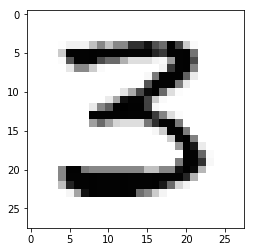

In [5]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

merged_summary = tf.summary.merge_all()
writer = tf.summary.FileWriter("./logs/test")
writer.add_graph(sess.graph)  # Show the graph

for epoch in range(training_epochs):
    avg_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, dropout_rate: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

print('Accuracy:',accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels, dropout_rate: 1}))
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], dropout_rate: 1}))

plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()